In [ ]:
#| hide
from ChemIITools.huckel import *
from ChemIITools.optimisation import *
from ChemIITools.kinetics import *
from ChemIITools.clusters import *
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#| echo: false
#| eval: true

# this exists to prevent windows filessystem errors
# Get directory name


## Try to remove tree; if failed show an error using try...except on screen
# import shutil
# try:
#     shutil.rmtree('../index_files')
# except OSError as e:
#     pass
#     #print ("Error: %s - %s." % (e.filename, e.strerror))

# ChemIITools

> Tools for Chemistry Part II programming

Documentation can be found at https://kgrewal1.github.io/ChemIITools/

## Install

```sh
pip install ChemIITools
```

## How to use

### Solve the Huckel Equation

Easily solve the Huckel equation for complex systems

Huckel Energies (degeneracy) for c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67: [-2.675 (1)]  [-2.214 (2)]  [-1.675 (2)]  [-1.539 (1)]  [-1.214 (1)]  [-1.000 (3)]  [-0.539 (2)]  [0.539 (2)]  [1.000 (3)]  [1.214 (1)]  [1.539 (1)]  [1.675 (2)]  [2.214 (2)]  [2.675 (1)] 


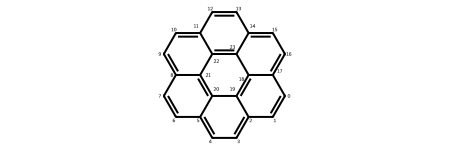

In [ ]:
mol = Huckel("c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67")
print(mol)
mol.molecule

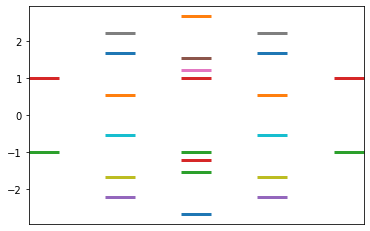

In [ ]:
mol.plot()

### Parse .out files and plot energy surfaces

Plot potential energy surfaces of symmetric triatomics and find the vibrational frequencies

In [ ]:
#| echo: false
h2opath = ('../Ex2/H2Ooutfiles')
h2o_vals = {}
for filename in os.listdir(h2opath):
    output = parse_out(os.path.join(h2opath, filename))
    h2o_vals[output[0]] = output[1]

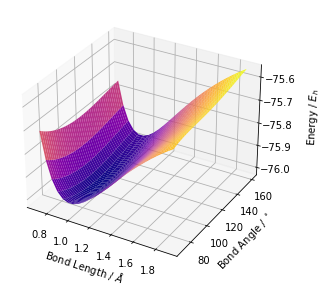

In [ ]:
surface_plot(h2o_vals)

In [ ]:
r_opt, theta_opt, nu_r, nu_theta = vib_calc(h2o_vals)
print('the optimum bond length of water is ', r_opt, ' angstroms with angle ', theta_opt, ' degrees' )
print('the stretching frequency ', round(nu_r), ' cm-1 and bending frequency ', round(nu_theta), ' cm-1' )

the optimum bond length of water is  0.95  angstroms with angle  105.0  degrees
the stretching frequency  3113  cm-1 and bending frequency  1665  cm-1


### Calculate steady state concentrations

Find the steady state concentration for chemical systems of the form
$$D  \xrightleftharpoons[k_{u}^{R15}]{k_{f}^{R15}}  I  \xrightleftharpoons[k_{u}^{R16}]{k_{f}^{R16}} N$$

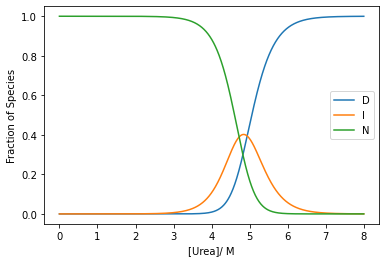

In [ ]:
kf1 = 26000
kr1 = 0.06
kf2 = 730
kr2 = 0.00075
urea_conc = np.linspace(0, 8, num=1000)
ss_conc = []
for conc in urea_conc:
    rates = [kf1*np.exp(-1.68*conc), kr1*np.exp(0.95*conc), kf2*np.exp(-1.72*conc), kr2*np.exp(1.20*conc)]
    ss_conc.append(steady_state_calc(rates))
ss_conc = np.array(ss_conc)
plt.plot(urea_conc,ss_conc[:, 0],label='D')
plt.plot(urea_conc,ss_conc[:, 1],label='I')
plt.plot(urea_conc,ss_conc[:, 2],label='N')
plt.xlabel('[Urea]/ M')
plt.ylabel('Fraction of Species')
plt.legend()
plt.show()

### Caclualte time evolution of a chemical system

In [ ]:
A, B, X, Y, Z, P, Q = 0.06, 0.06, 10**(-9.8),10**(-6.52), 10**(-7.32), 0, 0
concs = [A, B, X, Y, Z, P, Q]
t, conc_t= oreg_calc(concs)
As, Bs, Xs, Ys, Zs, Ps, Qs = conc_t

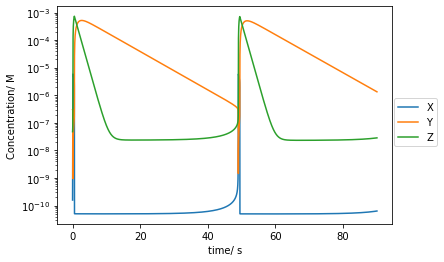

In [ ]:
plt.plot(t[::10000],Xs[::10000],label='X')
plt.plot(t[::10000],Ys[::10000],label='Y')
plt.plot(t[::10000],Zs[::10000],label='Z')
plt.yscale('log')
plt.xlabel('time/ s')
plt.ylabel('Concentration/ M')
plt.legend(bbox_to_anchor =(1.15, 0.6))
plt.show()

### Optimise Cluster Geometry

Energy -16.505384, for 7 points


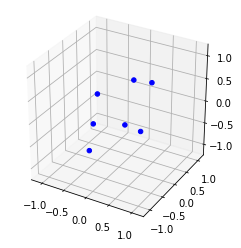

In [ ]:
lj7 = System(7, '(4*((1/r)**12 -(1/r)**6))')
lj7.optimise()
print(lj7)
lj7.plot()